In [24]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
X=[]
Y=[]
RAW_X=[]
resize_dim = (112, 112)
# Paths to dataset folders
input_folder = r"C:\Users\princ\Downloads\Vision datasets\archive (1) - Copy\casia dataset\50Classes"  
# Iterate over class folders in the dataset
for class_idx, class_folder in enumerate(os.listdir(input_folder)):
    class_path = os.path.join(input_folder, class_folder)
    if os.path.isdir(class_path):
        # Process each image in the class folder
        for filename in os.listdir(class_path):
            # Load the image in RGB
            image_path = os.path.join(class_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
            resized_image = cv2.resize(image, resize_dim)
            
            #normalized_image = normalize_image(resized_image)
            RAW_X.append(resized_image)
            #X.append(normalized_image)
            Y.append(class_idx)                        
                

In [26]:
# Convert X to a numpy array for easier computation
RAW_X = np.array(RAW_X)
Y= np.array(Y)

mean = np.mean(RAW_X, axis=(0, 1, 2)) 
std  = np.std(RAW_X, axis=(0, 1, 2)) 
X = (RAW_X-mean)/std

#Compute channel-wise global minimum and maximum
global_min = np.min(X, axis=(0, 1, 2))  # Shape: (3,) -> Min for R, G, B
global_max = np.max(X, axis=(0, 1, 2))  # Shape: (3,) -> Max for R, G, B

# Normalize each channel independently
X_scaled = np.zeros_like(X, dtype=np.float32)
for channel in range(3):
    X_scaled[..., channel] = (X[..., channel] - global_min[channel]) / (global_max[channel] - global_min[channel])

print(f"Global Min (per channel): {global_min}")
print(f"Global Max (per channel): {global_max}")
print("All images are now scaled to the range [0, 1] per channel.")

Global Min (per channel): [-1.90830781 -1.71737454 -1.52770739]
Global Max (per channel): [1.69866895 2.44416931 2.74139597]
All images are now scaled to the range [0, 1] per channel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9083078121467676..1.269145164128964].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9083078121467676..2.2483319513711097].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6961327084124722..2.356339585319021].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5704965188732598..2.4441693088195393].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.710277715328092..2.6242048939702483].


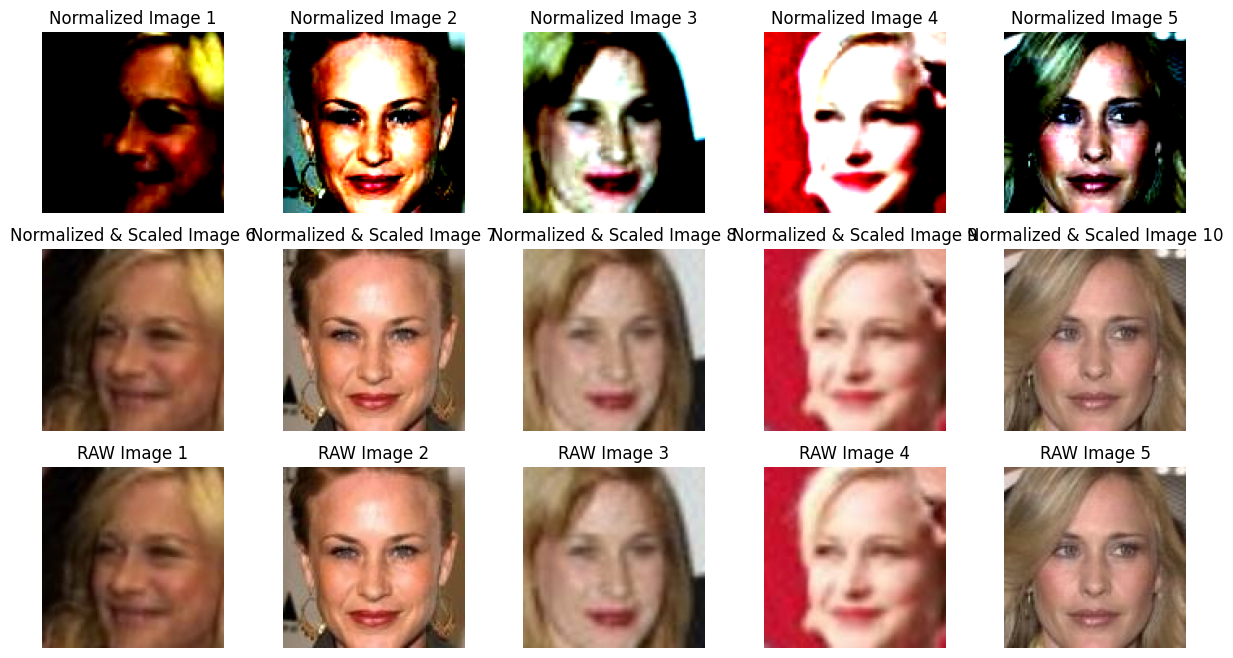

In [27]:
# Plot 5 random images from the X array
plt.figure(figsize=(15, 8))  
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(X[i]) 
    plt.axis('off')  
    plt.title(f"Normalized Image {i+1}")
    
    plt.subplot(3, 5, i+6)  
    plt.imshow(X_scaled[i]) 
    plt.axis('off')  
    plt.title(f"Normalized & Scaled Image {i+6}")
    
    plt.subplot(3, 5, i+11)  
    plt.imshow(RAW_X[i]) 
    plt.axis('off')  
    plt.title(f"RAW Image {i+1}")
plt.show()

In [28]:
X_scaled[0]

array([[[0.34901962, 0.24705882, 0.24313726],
        [0.30588236, 0.21176471, 0.20392157],
        [0.25882354, 0.16470589, 0.15686275],
        ...,
        [0.41960785, 0.2901961 , 0.12156863],
        [0.4627451 , 0.33333334, 0.17254902],
        [0.53333336, 0.40392157, 0.24313726]],

       [[0.34901962, 0.24705882, 0.24313726],
        [0.29803923, 0.20392157, 0.19607843],
        [0.23529412, 0.15294118, 0.14117648],
        ...,
        [0.44705883, 0.31764707, 0.14901961],
        [0.45490196, 0.3254902 , 0.16470589],
        [0.49411765, 0.3647059 , 0.20392157]],

       [[0.34509805, 0.2509804 , 0.24313726],
        [0.28627452, 0.19215687, 0.18431373],
        [0.21176471, 0.12941177, 0.11764706],
        ...,
        [0.4745098 , 0.3372549 , 0.17254902],
        [0.44313726, 0.30588236, 0.14901961],
        [0.44705883, 0.30980393, 0.15294118]],

       ...,

       [[0.38431373, 0.24705882, 0.17254902],
        [0.3882353 , 0.2509804 , 0.1764706 ],
        [0.42352942, 0

In [29]:
X= np.array(X)
Y= np.array(Y)
# Split the data into 70% training, 15% validation, and 15% testing
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size=0.15, random_state=42)



In [30]:
X_train[0]

array([[[-0.83328729, -0.50971083,  0.11296763],
        [-0.88986731, -0.57498995,  0.0460013 ],
        [-0.8615773 , -0.54235039,  0.0460013 ],
        ...,
        [-1.00302737, -0.52603061,  0.24690028],
        [-0.98888236, -0.50971083,  0.26364186],
        [-1.00302737, -0.49339105,  0.26364186]],

       [[-0.81914228, -0.49339105,  0.12970921],
        [-0.87572231, -0.55867017,  0.06274288],
        [-0.81914228, -0.49339105,  0.09622604],
        ...,
        [-1.01717238, -0.54235039,  0.2301587 ],
        [-1.00302737, -0.52603061,  0.24690028],
        [-1.01717238, -0.50971083,  0.24690028]],

       [[-0.83328729, -0.47707127,  0.17993395],
        [-0.87572231, -0.52603061,  0.09622604],
        [-0.76256225, -0.37915259,  0.19667553],
        ...,
        [-1.03131738, -0.55867017,  0.21341712],
        [-1.01717238, -0.54235039,  0.2301587 ],
        [-1.03131738, -0.52603061,  0.2301587 ]],

       ...,

       [[-1.44152258, -1.09722291, -0.52321248],
        [-1

In [31]:
#saving the train ,test and validation normalized dataset to be used later 

np.savez_compressed('X_train.npz', X=X_train)
np.savez_compressed('Y_train.npz', X=Y_train)

np.savez_compressed('X_test.npz', X=X_test)
np.savez_compressed('Y_test.npz', X=Y_test)

np.savez_compressed('X_val.npz', X=X_val)
np.savez_compressed('Y_val.npz', X=Y_val)

np.savez_compressed('X_train_1.npz', X=X_train_1)
np.savez_compressed('Y_train_1.npz', X=Y_train_1)

np.savez_compressed('X_test_1.npz', X=X_test_1)
np.savez_compressed('Y_test_1.npz', X=Y_test_1)
